In [3]:
import pandas as pd

df = pd.read_csv('/content/Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df1 = df.drop('customerID' , axis='columns')
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df1['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df1.shape

(7043, 20)

In [8]:
df1[pd.to_numeric(df1['TotalCharges'] , errors='coerce').isnull()].shape

(11, 20)

In [9]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'] , errors='coerce')

In [10]:
df2 = df1[~df1['TotalCharges'].isnull()] #Drop the samples where total charges are null or blank
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df2[df2['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


##Data Visualisation

In [13]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


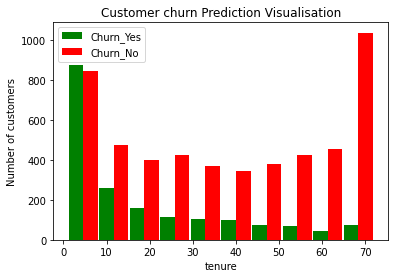

In [14]:
tenure_churn_no = df2[df2.Churn == 'No'].tenure
tenure_churn_yes = df2[df2.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([tenure_churn_yes , tenure_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


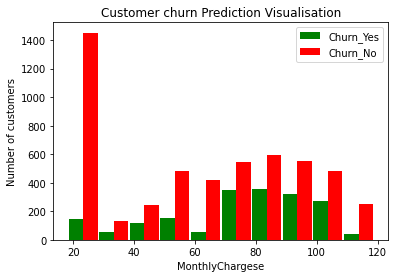

In [15]:
mc_churn_no = df2[df2.Churn == 'No'].MonthlyCharges
mc_churn_yes = df2[df2.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyChargese')
plt.ylabel('Number of customers')

plt.title('Customer churn Prediction Visualisation')

plt.hist([mc_churn_yes , mc_churn_no] , rwidth = 0.95 , color=['green' , 'red'] , label=['Churn_Yes' , 'Churn_No'])

plt.legend()
plt.show()

In [16]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df2['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
def print_unique_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} :  {df[column].unique()}')

In [19]:
print_unique_values(df2)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [20]:
df2 = df2.replace('No phone service' , 'No')
df2 = df2.replace('No internet service' , 'No')

In [21]:
print_unique_values(df2)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [22]:
yes_no_columns = ['Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'OnlineSecurity' ,
                  'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'PaperlessBilling' ,
                  'Churn']

for col in yes_no_columns:
  df2[col].replace({'Yes' :1 , 'No':0} , inplace=True)

In [23]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
for col in df2:
  print(col , ':' , df2[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [26]:
df2['gender'].replace({'Female':1 ,  'Male':0} , inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df3 = pd.get_dummies(data = df2 , columns = ['InternetService' , 'Contract' , 'PaymentMethod'])
df3.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [28]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [29]:
#Seperate features and labels into x and y

X = df3.drop('Churn' , axis='columns')
Y = df3['Churn']

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=0,train_size=0.8)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuarcy 0.8062222222222222
Testing Accuarcy 0.7995735607675906


Text(69.0, 0.5, 'Truth')

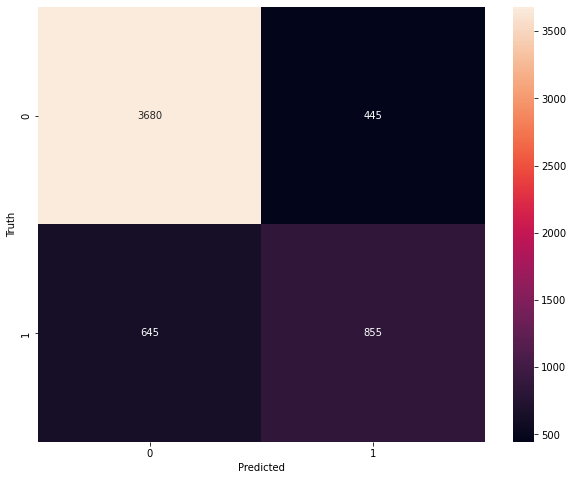

In [33]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lmodel = LogisticRegression()

lmodel.fit(xtrain,ytrain)

print('Training Accuarcy',lmodel.score(xtrain,ytrain))
print('Testing Accuarcy',lmodel.score(xtest,ytest))


from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_train = confusion_matrix(ytrain , lmodel.predict(xtrain))
cm_test = confusion_matrix(ytest , lmodel.predict(xtest))

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

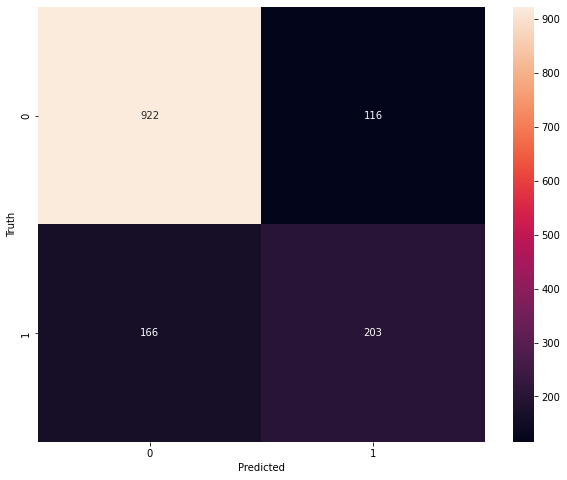

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [35]:
922 / (922+116)

0.8882466281310212

In [36]:
203 / (203+166)

0.5501355013550135

In [37]:
#Find out approx value for area under curve ...?

ytrain_pred_prob = lmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = lmodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8488403232323234
0.8353501887620032


In [38]:
fpr,tpr,thresh = roc_curve(ytrain,ytrain_pred_prob)

In [39]:
import numpy as np

g_val = tpr * (1-fpr)
idx = np.argmax(g_val)
print(idx)

1010


In [40]:
thresh[idx]

0.2854594528022813

In [41]:
print(fpr[idx] , tpr[idx])

0.2564848484848485 0.7973333333333333


In [42]:
#Evaluate the model performance for threshold 0.28

train_prediction = np.where(lmodel.predict_proba(xtrain)[:,1] >= 0.2854594528022813 , 1 , 0)
test_prediction = np.where(lmodel.predict_proba(xtest)[:,1] >= 0.2854594528022813 , 1 , 0)

In [43]:
(ytrain == train_prediction).sum() / len(xtrain)

0.7578666666666667

In [44]:
(ytest == test_prediction).sum() / len(xtest)

0.7526652452025586

Text(69.0, 0.5, 'Truth')

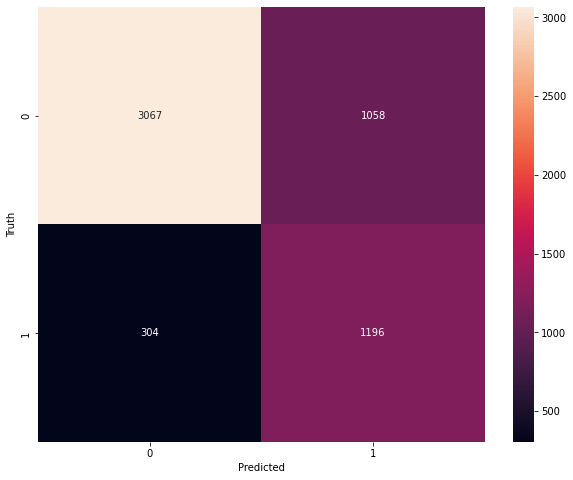

In [45]:
cm_train = confusion_matrix(ytrain , train_prediction)
cm_test = confusion_matrix(ytest , test_prediction)

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:
3067 / (3067+1058)

0.7435151515151515

In [47]:
1196 / (1196+304)

0.7973333333333333

Text(69.0, 0.5, 'Truth')

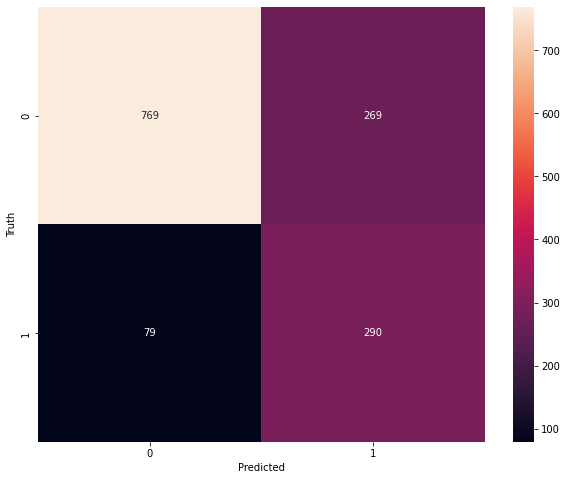

In [48]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
769 / (769+269)

0.7408477842003853

In [50]:
290 / (290+79)

0.7859078590785907

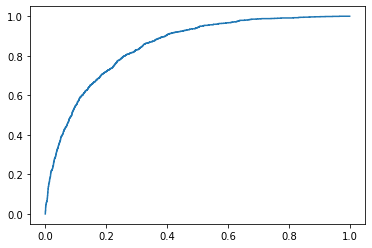

In [51]:
plt.plot(fpr, tpr)
plt.show()

In [52]:
lmodel.predict_proba(xtrain)[:,1]

array([0.13227033, 0.03563917, 0.00194622, ..., 0.21053636, 0.23383254,
       0.12897181])

In [53]:
#Support Vector Machine Model

from sklearn.svm import SVC
smodel = SVC(probability=True)

smodel.fit(xtrain,ytrain)

print(smodel.score(xtrain,ytrain))
print(smodel.score(xtest,ytest))

0.7333333333333333
0.7377398720682303


In [54]:
ytrain_pred_prob = smodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = smodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.7968150303030302
0.7878751090015716


In [55]:
fpr_s,tpr_s,thresh_s = roc_curve(ytrain,ytrain_pred_prob)

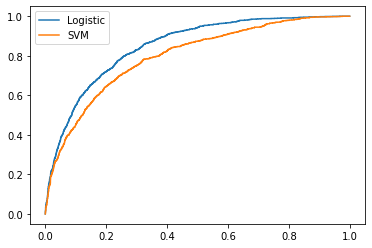

In [56]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.legend()

plt.show()

In [57]:
#Random Forest Model

from sklearn.ensemble import RandomForestClassifier
rmodel = RandomForestClassifier(max_depth=6)

rmodel.fit(xtrain,ytrain)

print(rmodel.score(xtrain,ytrain))
print(rmodel.score(xtest,ytest))

0.8184888888888889
0.7924662402274343


In [58]:
ytrain_pred_prob = rmodel.predict_proba(xtrain)[:,1]
ytest_pred_prob = rmodel.predict_proba(xtest)[:,1]

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8725878787878789
0.8428445363451709


In [59]:
fpr_r,tpr_r,thresh_r = roc_curve(ytrain,ytrain_pred_prob)

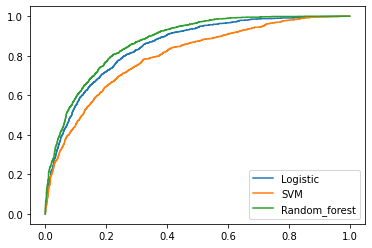

In [60]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.plot(fpr_r , tpr_r , label = 'Random_forest')

plt.legend()

plt.show()

In [61]:
#Neural Network Model

xtrain.shape[1]

26

In [62]:
xtrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2964,0,0,1,0,24,1,1,1,0,0,...,1,0,0,0,1,0,0,0,1,0
5113,1,0,1,1,71,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
5363,0,0,1,1,70,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5074,1,0,0,1,49,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
156,1,0,0,0,22,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [63]:
col_scale = ['tenure' , 'MonthlyCharges' ,	'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xtrain[col_scale] = scaler.fit_transform(xtrain[col_scale])
xtest[col_scale] = scaler.fit_transform(xtest[col_scale])

In [64]:
ytrain.shape

(5625,)

In [65]:
ytrain

2964    0
5113    0
5363    0
5074    0
156     0
       ..
4939    0
3269    0
1658    1
2612    0
2737    0
Name: Churn, Length: 5625, dtype: int64

In [67]:
from keras import models
from keras import layers

model = models.Sequential()                                       #Intilisation of neural network model
model.add(layers.Dense(16 , activation = 'relu' , input_dim = xtrain.shape[1]))            #adding hidden layers into it
model.add(layers.Dense(1 , activation = 'sigmoid'))                                        #5 neurons at output layer as target variable is having 5 values

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                432       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [69]:
from keras import optimizers
from keras import metrics

model.compile(optimizer = 'sgd',
              loss = 'binary_crossentropy' ,
              metrics = ['accuracy'])

In [70]:
model.fit(xtrain,ytrain,epochs=30)

Epoch 1/30
176/176 [==============================] - 3s 7ms/step - loss: 0.6045 - accuracy: 0.7108
Epoch 2/30
176/176 [==============================] - 1s 4ms/step - loss: 0.5484 - accuracy: 0.7324
Epoch 3/30
176/176 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7380
Epoch 4/30
176/176 [==============================] - 1s 4ms/step - loss: 0.4903 - accuracy: 0.7563
Epoch 5/30
176/176 [==============================] - 1s 4ms/step - loss: 0.4714 - accuracy: 0.7732
Epoch 6/30
176/176 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.7804
Epoch 7/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4495 - accuracy: 0.7858
Epoch 8/30
176/176 [==============================] - 1s 4ms/step - loss: 0.4434 - accuracy: 0.7868
Epoch 9/30
176/176 [==============================] - 1s 5ms/step - loss: 0.4391 - accuracy: 0.7897
Epoch 10/30
176/176 [==============================] - 1s 4ms/step - loss: 0.4359 - accuracy: 0.7900

In [71]:
model.evaluate(xtest,ytest)

44/44 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7989


[0.42539334297180176, 0.7988628149032593]

In [72]:
model.predict(xtrain)

array([[0.11727086],
       [0.02231997],
       [0.00765479],
       ...,
       [0.23618355],
       [0.22399533],
       [0.13969505]], dtype=float32)

Text(69.0, 0.5, 'Truth')

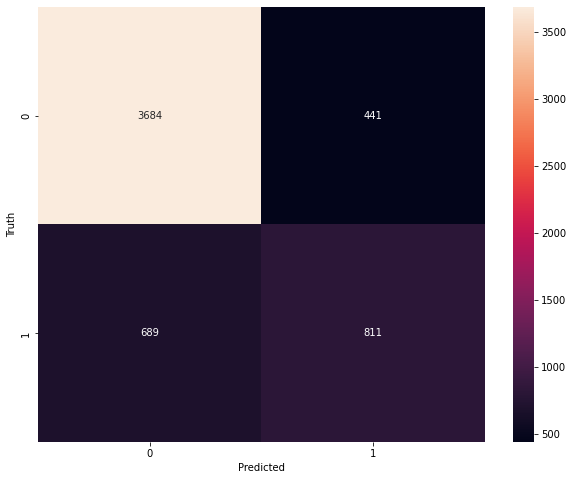

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm_train = confusion_matrix(ytrain , np.round(model.predict(xtrain)))
cm_test = confusion_matrix(ytest , np.round(model.predict(xtest)))

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

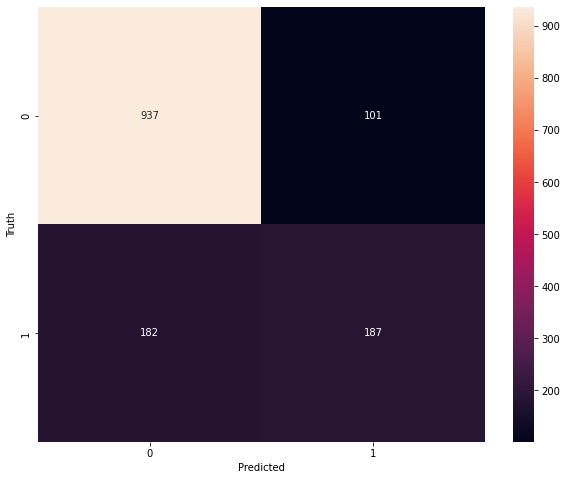

In [74]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
ytrain_pred_prob = model.predict(xtrain)
ytest_pred_prob = model.predict(xtest)

from sklearn.metrics import roc_auc_score,roc_curve
auc_train = roc_auc_score(ytrain,ytrain_pred_prob)
auc_test = roc_auc_score(ytest,ytest_pred_prob)

print(auc_train)
print(auc_test)

0.8451650909090909
0.8361987039908935


In [76]:
fpr_m,tpr_m,thresh_m = roc_curve(ytrain,ytrain_pred_prob)

In [77]:
g_val = tpr_m * (1-fpr_m)
np.argmax(g_val)

955

In [78]:
thresh[960]

0.30916337499104884

In [79]:
#Accuracy of my model if i want to use threshold value as 0.30 to make decision as 0 or 1 ...?

train_prediction = np.where(model.predict(xtrain) >= 0.30916337499104884 , 1 , 0)
test_prediction = np.where(model.predict(xtest) >= 0.30916337499104884 , 1 , 0)

In [80]:
ytrain
train_prediction.ravel()

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
(ytrain == train_prediction.ravel()).sum() / len(xtrain)

0.7655111111111111

In [82]:
(ytest == test_prediction.ravel()).sum() / len(xtest)

0.767590618336887

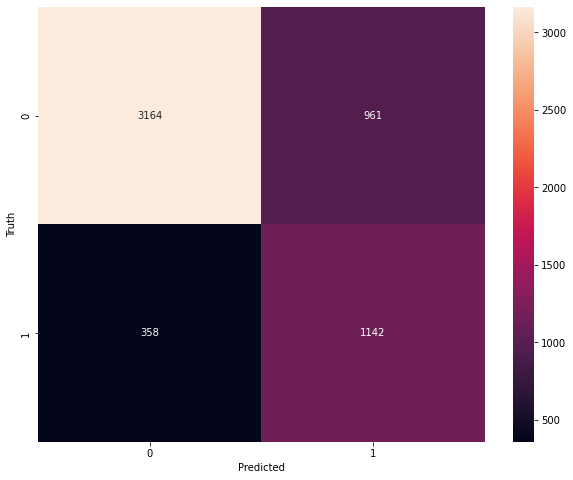

In [83]:
cm_train = confusion_matrix(ytrain , train_prediction.ravel())
cm_test = confusion_matrix(ytest , test_prediction.ravel())

plt.figure(figsize = (10,8))
sns.heatmap(cm_train , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [84]:
print(3179 / (3179+946))
print(1145 / (1145+355))

0.7706666666666667
0.7633333333333333


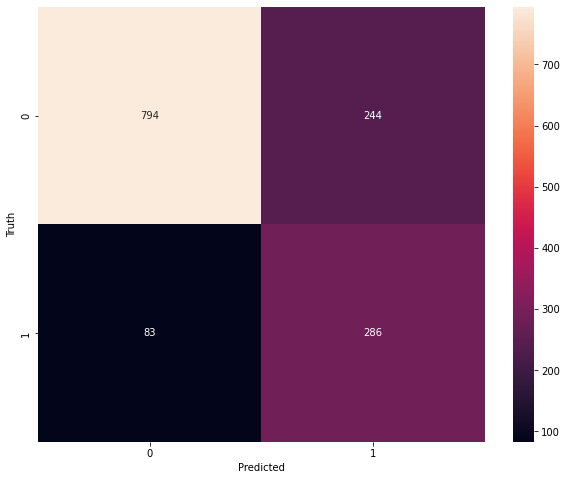

In [85]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_test , annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [86]:
print(800 / (800+238))
print(281 / (281+88))

0.7707129094412332
0.7615176151761518


In [87]:
#Predictions

model.predict(xtest.values[0].reshape(1,26))


array([[0.234043]], dtype=float32)

In [88]:
np.round(model.predict(xtest.values[0].reshape(1,26)))

array([[0.]], dtype=float32)

In [89]:
int(model.predict(xtest.values[0].reshape(1,26)) >= 0.30916337499104884)

0

In [90]:
ytest.values[0]

0

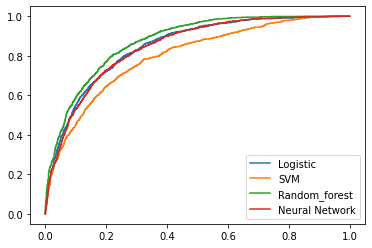

In [91]:
plt.plot(fpr, tpr , label = 'Logistic')

plt.plot(fpr_s , tpr_s , label = 'SVM')

plt.plot(fpr_r , tpr_r , label = 'Random_forest')

plt.plot(fpr_m , tpr_m , label = 'Neural Network')

plt.legend()

plt.show()